<a href="https://colab.research.google.com/github/ali-zohrevand/image-proccessing-lab/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Convert uploaded image into uint type
# How to Import an image
from google.colab import files
import matplotlib.pyplot as plt


# Filtering in Spatial Domain:

#a: 

**Average(Mean) filter**

In [ ]:
# Select file from Local Drive

img = plt.imread('drive/MyDrive/Image_Proccessing/Home_Works/hw2/image1.jpg')


In [ ]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import rank

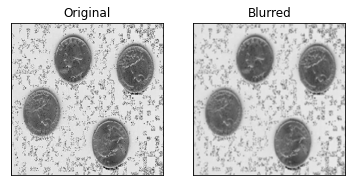

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# b 

**Median filter**

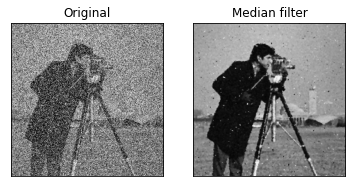

In [ ]:
img = plt.imread('drive/MyDrive/Image_Proccessing/Home_Works/hw2/image2.jpg')
blur = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Laplacian filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


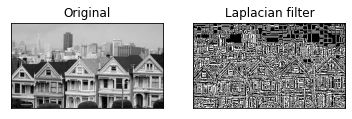

In [ ]:
img = plt.imread('drive/MyDrive/Image_Proccessing/Home_Works/hw2/image3.jpg')
blur = cv2.Laplacian(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Laplacian filter')
plt.xticks([]), plt.yticks([])
plt.show()

# d: Sobel

In [ ]:
img = plt.imread('drive/MyDrive/Image_Proccessing/Home_Works/hw2/image4.jpg')
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)  # y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


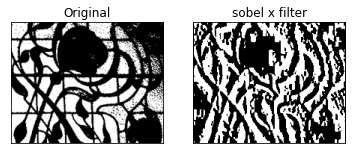

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


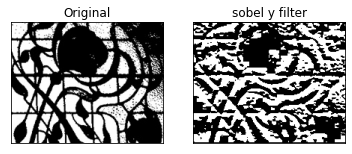

In [ ]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobelx),plt.title('sobel x filter')
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobely),plt.title('sobel y filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Filtering in Frequency Domain

# `Transformation (FFT)`

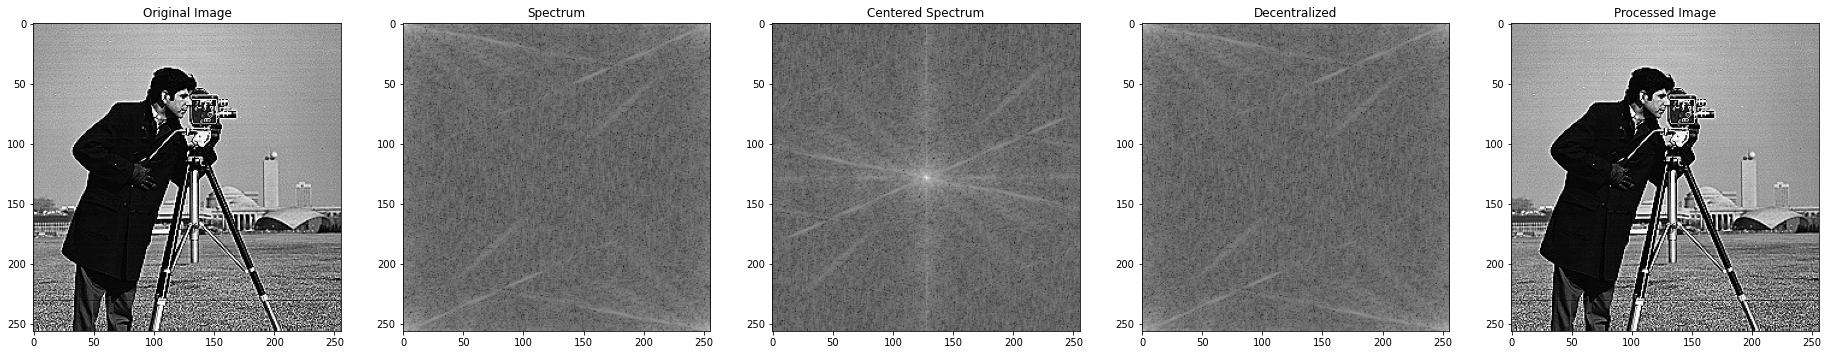

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("drive/MyDrive/Image_Proccessing/Home_Works/hw2/image5.jpg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

# B: Ideal Low Pass Filter (ILPF) and Ideal High Pass Filter (IHPF)

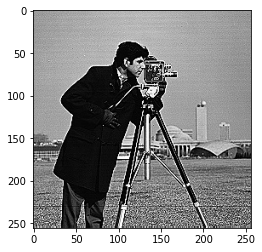

In [2]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("drive/MyDrive/Image_Proccessing/Home_Works/hw2/image5.jpg")/float(2**8)

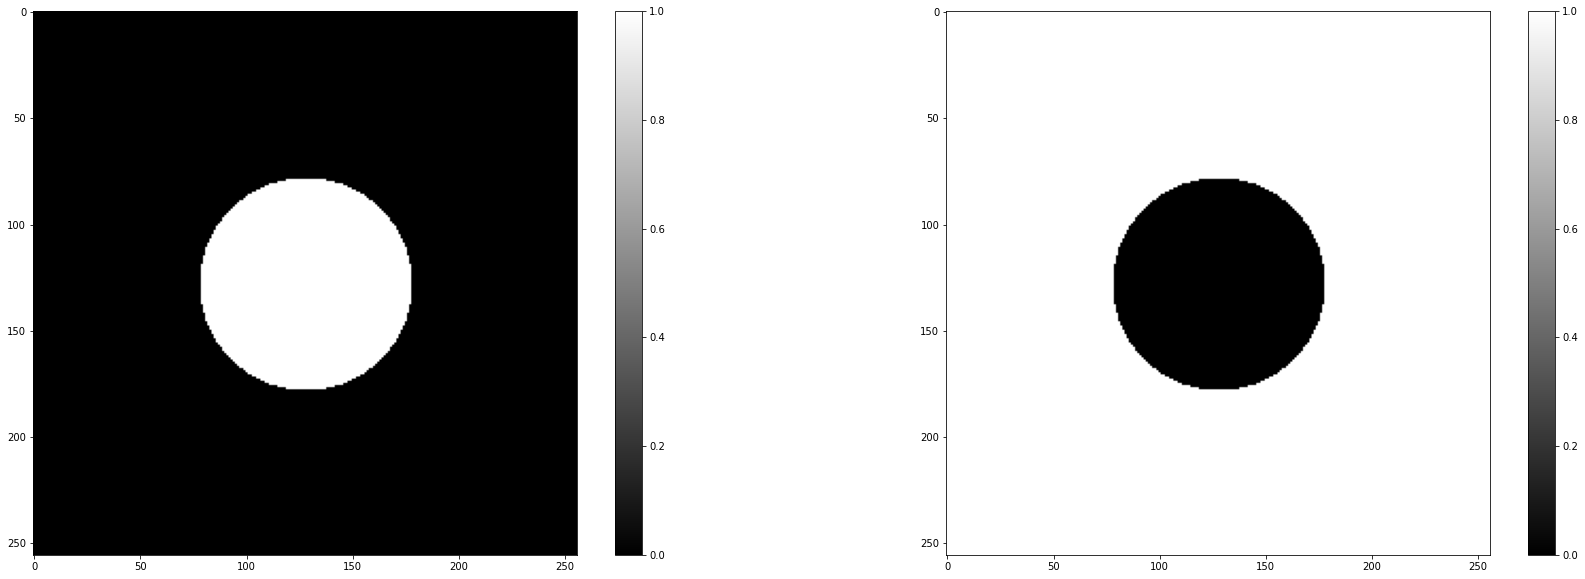

In [3]:
shape = img.shape[:2]

def draw_cicle(shape,diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)


TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=50)
TFcircleOUT  = ~TFcircleIN

fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT,cmap="gray")
plt.colorbar(im)
plt.show()

In [5]:
fft_img = np.zeros_like(img,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))

In [7]:
def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    ## circle IN
    temp = filter_circle(TFcircleIN,fft_img_channel)
    fft_img_filtered_IN.append(temp)
    ## circle OUT
    temp = filter_circle(TFcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))

In [8]:


abs_fft_img              = np.abs(fft_img)
abs_fft_img_filtered_IN  = np.abs(fft_img_filtered_IN)
abs_fft_img_filtered_OUT = np.abs(fft_img_filtered_OUT)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


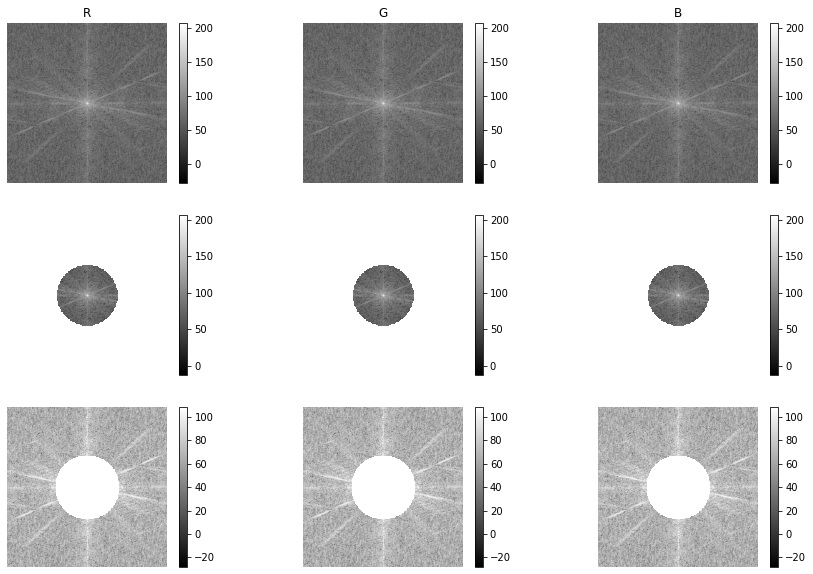

In [9]:
def imshow_fft(absfft):
    magnitude_spectrum = 20*np.log(absfft)
    return(ax.imshow(magnitude_spectrum,cmap="gray"))

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
fontsize = 15 
for ichannel, color in enumerate(["R","G","B"]):
    ax = axs[0,ichannel]
    ax.set_title(color)
    im = imshow_fft(abs_fft_img[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("original DFT",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    
    ax = axs[1,ichannel]
    im = imshow_fft(abs_fft_img_filtered_IN[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT + low pass filter",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    ax = axs[2,ichannel]
    im = imshow_fft(abs_fft_img_filtered_OUT[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT + high pass filter",fontsize=fontsize)   
    fig.colorbar(im,ax=ax)
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


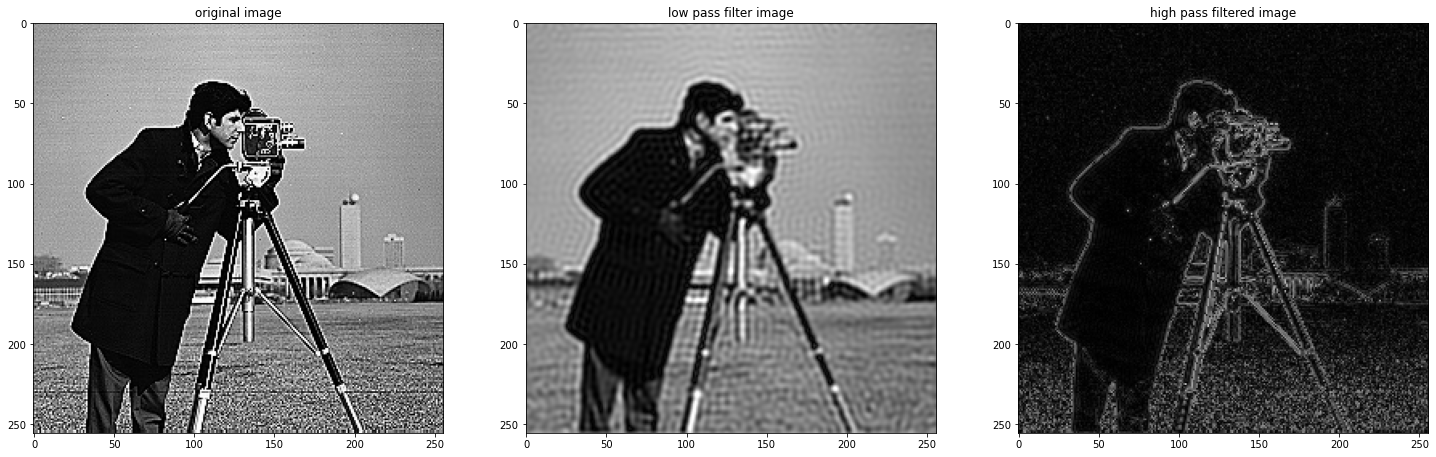

In [10]:
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)
ax.imshow(np.abs(img_reco))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")


ax  = fig.add_subplot(1,3,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")
plt.show()

# Gaussian Smoothing

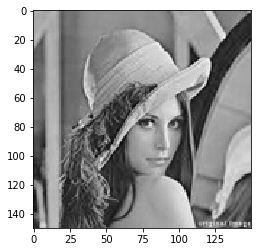

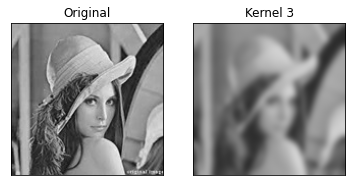

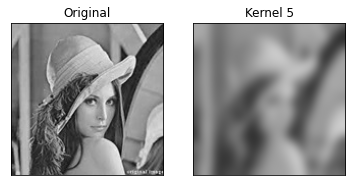

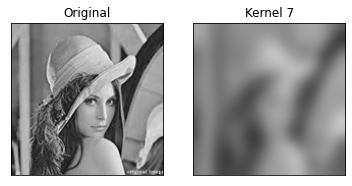

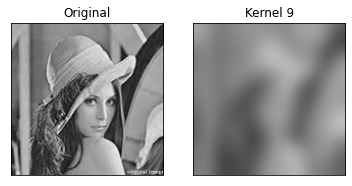

In [31]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

img = plt.imread("drive/MyDrive/Image_Proccessing/Home_Works/hw2/image6.jpg")/float(2**8)
plt.imshow(img, interpolation='nearest')
plt.show()
# Note the 0 sigma for the last axis, we don't wan't to blurr the color planes together!
img3 = ndimage.gaussian_filter(img, sigma=(3, 3, 0), order=0)
img5 = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
img7 = ndimage.gaussian_filter(img, sigma=(7, 7, 0), order=0)
img9 = ndimage.gaussian_filter(img, sigma=(9, 9, 0), order=0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3),plt.title('Kernel 3')
plt.xticks([]), plt.yticks([])

plt.show()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img5),plt.title('Kernel 5')
plt.xticks([]), plt.yticks([])

plt.show()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img7),plt.title('Kernel 7')
plt.xticks([]), plt.yticks([])

plt.show()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img9),plt.title('Kernel 9')
plt.xticks([]), plt.yticks([])

plt.show()